In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
from matplotlib import pyplot as plt
import seaborn as sns
import plotly 
import plotly.plotly as py 
import plotly.graph_objs as go

In [2]:
#将爬取到的信息存入BeautifulSoup里
mp1 = BeautifulSoup(open('mypage1.txt'))
mp2 = BeautifulSoup(open('mypage2.txt'))
mp3 = BeautifulSoup(open('mypage3.txt'))
mp4 = BeautifulSoup(open('mypage4.txt'))
#进行一次data cleaning得到新的csv
#（在mp4中发现有一个网页无法打开，找出来并且在原来的csv中删除，因为会对接下来的数据分析造成不便）

#找到所有的年份
def find_year(mp):
    myh1s = mp.find_all('h1')
    years = []
    for myh1 in myh1s:
        my_year = myh1.find('span',attrs = {'class':'year'})
        if my_year is not None:
            my_year = my_year.text.strip('()')
        else:
            my_year = None
        years.append(my_year)
    return years

years1 = find_year(mp1)
years2 = find_year(mp2)
years3 = find_year(mp3)
years4 = find_year(mp4)
all_years = years1 + years2 + years3 + years4

#找到所有评分了的人数
def find_rating_people(mp):
    rps = []
    rs = mp.find_all('div',attrs = {'class':'rating_sum'})
    for r in rs:
        rp = r.find('span',attrs = {'property':'v:votes'})
        if rp is not None:
            rp = rp.text.strip('人评价')
        else:
            rp = None
        rps.append(rp)
    return rps

rp1 = find_rating_people(mp1)
rp2 = find_rating_people(mp2)
rp3 = find_rating_people(mp3)
rp4 = find_rating_people(mp4)
rp = rp1 + rp2 + rp3 +rp4

#给抓出来的电视赋上排名
rank = []
for i in range(1,2175):
    rank.append((i))

#打开这个新的csv
new_table = pd.read_csv('my_TV_series_list.csv',encoding = 'gbk')

#在表格中插入年份和评价的人数
new_table.insert(0,'排名',rank)
new_table.insert(2,'年份',all_years)
new_table.insert(4,'评价人数',rp)
new_table

#发现编剧、集数、单集片长所需要的这几个信息都在info中
def all_info(mp):
    information = mp.find_all('div',attrs = {'id':'info'})
    return information

info1 = all_info(mp1)
info2 = all_info(mp2)
info3 = all_info(mp3)
info4 = all_info(mp4)

all_info = info1 + info2 + info3 + info4

#在爬集数的数据的时候发现集数的数字在span之外，但包含在info中，因此发现可以对info操作，将问题变成对字符串的操作，会更加高效和简单
information = []
for info in all_info:
    information.append(info.text.strip().split('\n'))

headers = ['编剧', '类型', '集数', '单集片长']
def needs(header):
    req = []
    for inf in information:
        a = None
        for i in inf:
            if i.find(header) != -1:
                a = i[len(header) + 1:].strip('分钟') #+1是因为还有”：”
                break
        req.append(a)
    return req
for header in headers:
    new_table[header] = needs(header)
    
#将抓取的信息放入这个表格中并进行顺序的调整
new_table.insert(6, '编剧', new_table.pop('编剧'))
new_table.insert(8, '类型', new_table.pop('类型'))
new_table.insert(9, '集数', new_table.pop('集数'))
new_table.insert(10, '单集片长', new_table.pop('单集片长'))
new_table.insert(11, '豆瓣网址', new_table.pop('豆瓣网址'))

#输出最终需要的csv
new_table.to_csv('results.csv', encoding = 'gbk',index = False)

In [39]:
df = pd.read_csv('results.csv',encoding = 'gbk')

In [40]:
from dateutil.parser import parse
import matplotlib

%matplotlib inline

In [31]:
df['年份'] = df['年份'].apply(str).apply(parse)

In [ ]:
pd.pivot_table(
    index = '年份', columns = []
)

In [73]:
df_pjrs = df.sort_values(by = '评价人数', ascending = False)
df['评价人数'].describe()

count      2165.000000
mean       5209.726559
std       17042.822626
min          29.000000
25%         157.000000
50%         525.000000
75%        2611.000000
max      255060.000000
Name: 评价人数, dtype: float64

In [74]:
aa = df_pjrs.head(20)

In [140]:
aa

,排名,电视剧名称,年份,评分,评价人数,导演,编剧,主演,类型,集数,单集片长,豆瓣网址
3,4,琅琊榜,2015,9.2,255060,孔笙 / 李雪,海宴,胡歌 / 刘涛 / 王凯 / 陈龙 / 黄维德,剧情 / 古装,54,45,https://movie.douban.com/subject/25754848/
10,11,白夜追凶,2017,9.0,244112,王伟,指纹 / 顾小白,潘粤明 / 王泷正 / 梁缘 / 吕晓霖 / 尹姝贻,剧情 / 悬疑 / 犯罪,32,45,https://movie.douban.com/subject/26883064/
419,424,延禧攻略,2018,7.2,207089,惠楷栋 / 温德光,周末,秦岚 / 聂远 / 佘诗曼 / 吴谨言 / 许凯,剧情 / 爱情 / 古装,70,45,https://movie.douban.com/subject/26999852/
66,67,人民的名义,2017,8.3,206583,李路,周梅森,陆毅 / 柯蓝 / 张丰毅 / 吴刚 / 许亚军,剧情 / 悬疑 / 犯罪,52,55,https://movie.douban.com/subject/26727273/
11,12,后宫·甄_传,2011,9.0,169845,郑晓龙,流潋紫 / 王小平,孙俪 / 陈建斌 / 蔡少芬 / 李东学 / 蒋欣,剧情 / 古装,76,45,https://movie.douban.com/subject/4922787/
207,208,香蜜沉沉烬如霜,2018,7.7,168643,朱锐斌 / 李秉光 / 澄丰,马佳 / 徐子善 / 刘格林 / 陈璐莎 / 张鸢盎,杨紫 / 邓伦 / 陈钰琪 / 罗云熙 / 王一菲,剧情 / 爱情 / 奇幻 / 古装,63,45,https://movie.douban.com/subject/26920281/
326,329,如懿传,2018,7.4,140445,汪俊,流潋紫,周迅 / 霍建华 / 张钧甯 / 李纯 / 辛芷蕾,剧情 / 历史 / 古装,87,45,https://movie.douban.com/subject/25812730/
844,851,三生三世十里桃花,2017,6.4,123056,林玉芬 / 余翠华,弘伙 / 唐七,杨幂 / 赵又廷 / 张智尧 / 迪丽热巴 / 高伟光,剧情 / 爱情,58,45,https://movie.douban.com/subject/25975243/
1449,1459,青云志,2016,5.3,122180,朱锐斌 / 周远舟 / 刘国辉 / 朱少杰,邵潇逸 / 张少微 / 张戬,李易峰 / 赵丽颖 / 杨紫 / 舒畅 / 王源,奇幻 / 武侠 / 古装,55,45,https://movie.douban.com/subject/25823275/
371,375,欢乐颂,2016,7.3,121339,孔笙 / 简川_,袁子弹 / 阿耐,刘涛 / 蒋欣 / 王子文 / 杨紫 / 乔欣,剧情 / 爱情,42,43,https://movie.douban.com/subject/26430092/


In [152]:
year2010 = aa[(aa['年份']>2015) & (aa['年份']<2017)]


,排名,电视剧名称,年份,评分,评价人数,导演,编剧,主演,类型,集数,单集片长,豆瓣网址
1449,1459,青云志,2016,5.3,122180,朱锐斌 / 周远舟 / 刘国辉 / 朱少杰,邵潇逸 / 张少微 / 张戬,李易峰 / 赵丽颖 / 杨紫 / 舒畅 / 王源,奇幻 / 武侠 / 古装,55,45,https://movie.douban.com/subject/25823275/
371,375,欢乐颂,2016,7.3,121339,孔笙 / 简川_,袁子弹 / 阿耐,刘涛 / 蒋欣 / 王子文 / 杨紫 / 乔欣,剧情 / 爱情,42,43,https://movie.douban.com/subject/26430092/
114,115,鬼吹灯之精绝古城,2016,8.1,114410,孔笙 / 周游 / 孙墨龙,白一骢 / 天下霸唱,靳东 / 陈乔恩 / 赵达 / 岳_ / 王永泉,剧情 / 悬疑 / 惊悚,21,35,https://movie.douban.com/subject/26298935/
15,16,最好的我们,2016,8.8,94213,刘畅,八月长安 / 李嘉 / 殷姝双双 / 陈潇骁 / 吴桐 / 陆洋 / 赵_ / 倪守国,刘昊然 / 谭松韵 / 王栎鑫 / 董晴 / 李砚,剧情 / 爱情,24,45,https://movie.douban.com/subject/26602244/
791,797,微微一笑很倾城,2016,6.5,88468,林玉芬,顾漫 / 沈飞弦 / 李文婷 / 欧阳晓_ / 马克明 / 何昕明 / 王加安 / 陈亚孜...,郑爽 / 杨洋 / 毛晓彤 / 白宇 / 郑业成,剧情 / 爱情,30,45,https://movie.douban.com/subject/26427831/


In [78]:
pd_df3 = aa.groupby(['电视剧名称'])['评价人数'].mean().reset_index().sort_values("评价人数",ascending=False)
attr = aa.电视剧名称
# v1 = aa.评分  #you can pass a list like data here
v2 = aa.评价人数
bar = Bar("Countries by likes and bookmark")
# bar.add("评分", attr, v1, mark_line=["average"])
bar.add("by 评价人数", attr, v2, mark_line=["average"])
bar

In [81]:
#根据主演的电视剧评分和其在2010s中主演的电视剧的部数进行加权平均，得到每个演员的评分情况

fss = []
for i in range(2165):
    fs = (df['主演'][i].split(' / '), df['评分'][i])
    rw = []
    for f in fs[0]:
        rw.append((f,fs[1]))
    fss += rw

names = {}
for fs in fss:
    if names.get(fs[0]) == None:
        names[fs[0]] = [fs[1], 1]
    else:
        names[fs[0]][0] += fs[1]
        names[fs[0]][1] += 1
        
for value in names.values():
    value[0] = round(value[0] / value[1], 2)
    
pop_name_list = []
for item in names.items():
    if item[1][1] < 3: #只出演过2部电视剧的主演将其剔除，因为2部电视剧决定评分有点以偏概全，因此将出演电视剧部数在2部以上才纳入分析内容。
        pop_name_list.append(item[0])
        
for name in pop_name_list:
    names.pop(name)
    
yypm = sorted(names.items(), key=lambda d:d[1], reverse = True)#对评分排序

ac_score = []
ac_freq = []
ac_name = []

for y in yypm:
    ac_score.append(y[1][0])
    ac_freq.append(y[1][1])
    
for y in yypm:
    ac_name.append(y[0])
    
mydata = pd.DataFrame({'演员':ac_name,
                      '平均分':ac_score,
                      '部数':ac_freq})


In [83]:
mydata1 = mydata.sort_values(by = '部数', ascending = False)

In [85]:
top15 = mydata1.head(15)

In [90]:
top15

,演员,平均分,部数
857,于震,5.26,32
67,张嘉译,7.12,30
950,刘恺威,4.94,29
194,刘涛,6.68,26
297,林永健,6.44,25
290,潘虹,6.45,22
177,于和伟,6.73,21
566,杨幂,5.93,21
353,王雷,6.34,21
451,佟丽娅,6.16,20


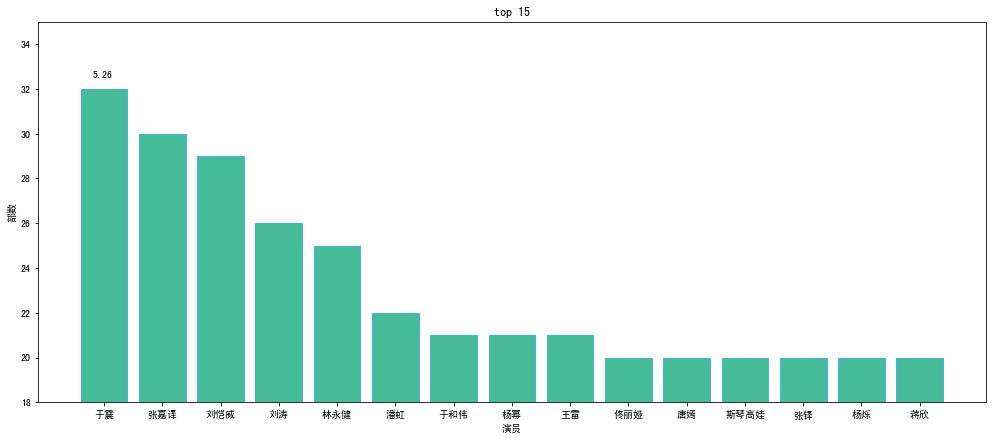

In [138]:
plt.rcParams['font.sans-serif']=['SimHei'] #set for displaying Chinese characters here.
plt.rcParams['axes.unicode_minus']=False #set for displaying `-`

plt.subplots(figsize=(17,7)) 
plt.bar(top15['演员'],top15['部数'],color = '#46bc99',edgecolor = '#40b4e5') 
plt.ylim(18,35)

plt.title('top 15') #plot title and label name
plt.xlabel('演员')
plt.ylabel('部数')

plt.text(-0.2, 32.5, r'5.26')
# plt.annotate('Forty-six books have more than 830000 words but less than 1480000 words.', xy=(12, 2), xytext=(10, 2),fontsize=2,
#             arrowprops=dict(facecolor='black', width=1))


plt.show()


In [6]:
top20 = mydata.head(20)

In [80]:
# pd_df3 = mydata.groupby(['演员'])['平均分'].mean().reset_index().sort_values("评价人数",ascending=False)
attr = top20.演员
v1 = top20.平均分
v2 = top20.部数
bar = Bar("Countries by likes and bookmark")
bar.add("平均分", attr, v1, mark_line=["average"])
bar.add("部数", attr, v2, mark_line=["average"])
bar

In [7]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

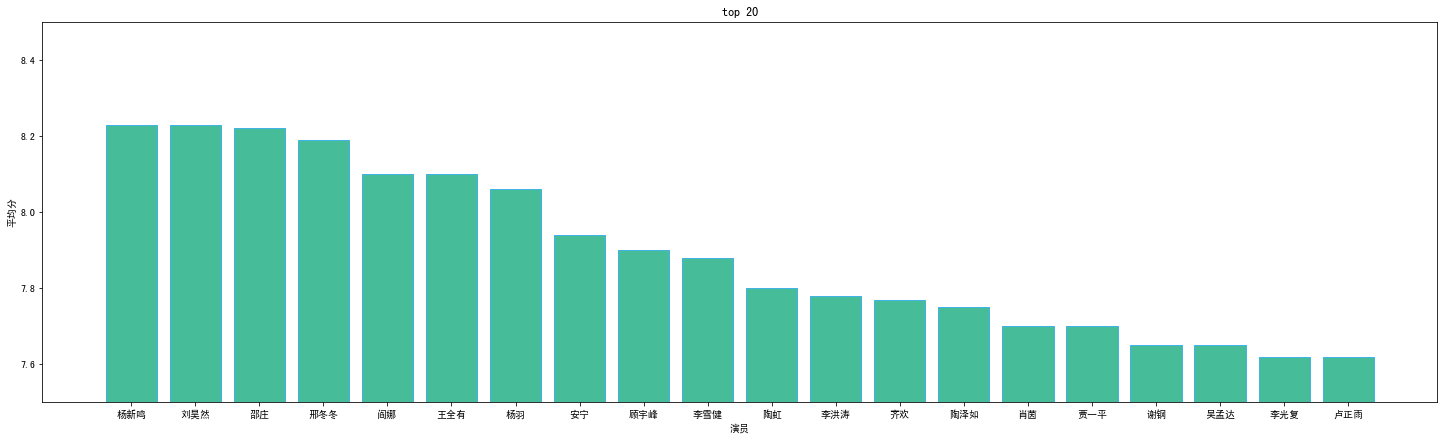

In [8]:
fig = plt.figure(figsize=(25,7)) #adjust size
plt.bar(top20['演员'],top20['平均分'],color = '#46bc99',edgecolor = '#40b4e5') 
plt.ylim(7.5,8.5)

plt.title('top 20') #plot title and label name
plt.xlabel('演员')
plt.ylabel('平均分')

# plt.text()

plt.show()



#


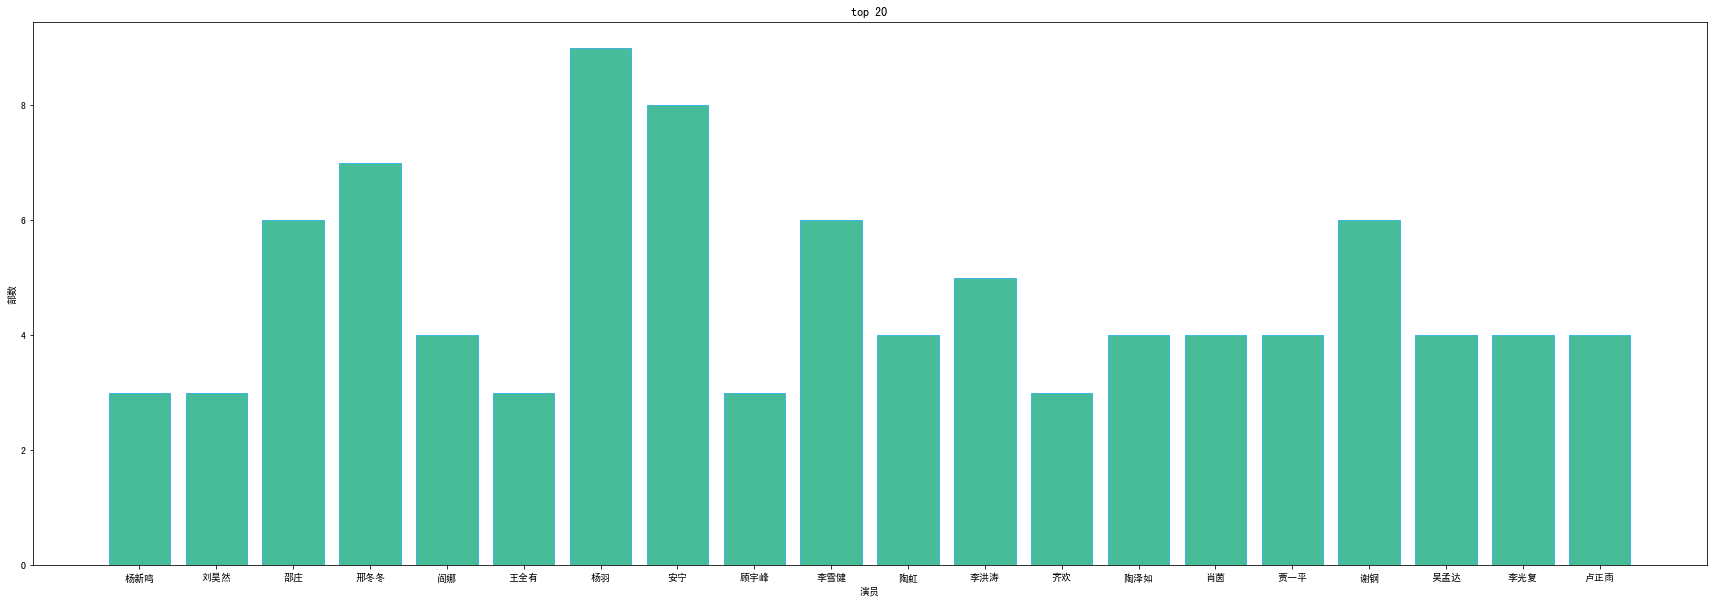

In [9]:
fig = plt.figure(figsize=(30,10)) #adjust size
plt.bar(top20['演员'],top20['部数'],color = '#46bc99',edgecolor = '#40b4e5') 


plt.title('top 20') #plot title and label name
plt.xlabel('演员')
plt.ylabel('部数')
plt.show()

In [27]:
import matplotlib
print(matplotlib.matplotlib_fname())
#/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc

!open /Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/matplotlib/mpl-data

/Users/linhuiqing/venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
The file /Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/matplotlib/mpl-data does not exist.


In [156]:
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/linhuiqing/venv/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [157]:
!open /Users/linhuiqing/venv/lib/python3.7/site-packages/matplotlib/mpl-data/

In [159]:
import matplotlib as mpl
mpl.get_cachedir()

'/Users/linhuiqing/.matplotlib'

In [160]:
!open /Users/linhuiqing/.matplotlib

In [1]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = 假

NameError: name 'plt' is not defined

In [45]:
from __future__ import unicode_literals

In [50]:
from pyecharts import Bar

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [47]:
scatter = Scatter("散点图示例")
scatter.add("A", v1, v2)
scatter.add(
    "B",
    v1[::-1],
    v2,
    is_visualmap=True,
    visual_type="size",
    visual_range_size=[20, 80],
)
scatter.render()

NameError: name 'Scatter' is not defined